ID:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [16]:
import pandas as pd

# Cargar únicamente la columna 'id' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_since'], delimiter=',', encoding='latin-1')


# Verificar si la columna 'id' existe en el DataFrame
if 'host_since' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_since'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_since'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_since'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_since'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_since'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_since':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'host_since' no existe en el DataFrame.")

Columna 'host_since':
 - Tipo de dato: object
 - Cantidad de nulos: 165
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 4240
 - Cantidad de datos totales: 279712


ANALISIS CUALITATIVO 

In [17]:
if 'host_since' in data.columns: 
    # Moda
    moda = data['host_since'].mode()[0]
    
    # Cantidad por variable
    cantidad_por_variable = data['host_since'].value_counts()
    
    # Porcentaje por variable
    porcentaje_por_variable = (cantidad_por_variable / cantidad_totales) * 100
    
    # Imprimir resultados formateados
    print(f"Columna 'host_since':")
    print(f" - Moda: {moda}\n")
    print(" - Cantidad por variable:")
    for valor, cantidad in cantidad_por_variable.items():
        print(f"   {valor}: {cantidad}")
    print("\n - Porcentaje por variable:")
    for valor, porcentaje in porcentaje_por_variable.items():
        print(f"   {valor}: {porcentaje:.2f}%")
else:
    print("La columna 'host_since' no existe en el DataFrame.")

Columna 'host_since':
 - Moda: 2019-09-02

 - Cantidad por variable:
   2019-09-02: 710
   2013-07-16: 463
   2018-02-24: 463
   2016-09-29: 415
   2015-12-16: 368
   2020-10-07: 335
   2016-12-16: 335
   2015-05-21: 331
   2020-01-09: 324
   2015-10-05: 319
   2013-01-04: 312
   2013-04-23: 298
   2012-06-18: 294
   2016-02-03: 289
   2016-04-18: 289
   2015-12-10: 283
   2016-08-24: 282
   2013-07-22: 281
   2019-07-24: 279
   2014-11-09: 266
   2019-10-29: 265
   2015-07-27: 263
   2017-05-14: 263
   2016-01-27: 258
   2015-03-16: 257
   2017-06-27: 250
   2016-03-03: 243
   2014-08-01: 241
   2014-06-20: 239
   2017-07-05: 237
   2014-04-28: 233
   2018-07-11: 232
   2014-06-04: 230
   2016-02-01: 226
   2013-07-10: 225
   2014-05-19: 221
   2014-09-22: 219
   2016-08-01: 216
   2014-10-20: 214
   2016-08-22: 209
   2016-09-21: 209
   2016-01-28: 208
   2015-07-01: 207
   2015-08-11: 206
   2015-07-05: 205
   2014-07-28: 199
   2014-12-01: 199
   2016-07-12: 199
   2018-07-24: 198


In [18]:
# Convertir a datetime, manejando errores
data['host_since_datetime'] = pd.to_datetime(data['host_since'], errors='coerce')

# Filtrar solo los valores datetime válidos (no NaT) y que no sean nulos en el original
datetimes_validos = data[~data['host_since_datetime'].isna() & ~data['host_since'].isna()]

# Identificar registros con hora diferente de 00:00:00
horas_no_cero = datetimes_validos['host_since_datetime'].dt.time != pd.Timestamp('00:00:00').time()
registros_con_hora = datetimes_validos[horas_no_cero]

# Mostrar estadísticas
print(f"Total de registros convertidos: {len(datetimes_validos)}")
print(f"Registros con hora diferente a 00:00:00: {len(registros_con_hora)}")

# Mostrar ejemplos de fechas con horas diferentes
if not registros_con_hora.empty:
    print("\nEjemplos de fechas con horas diferentes a 00:00:00:")
    # Extraer fecha, hora y el valor original para inspección
    ejemplos = registros_con_hora[['host_since', 'host_since_datetime']].copy()
    ejemplos['hora'] = ejemplos['host_since_datetime'].dt.time
    print(ejemplos.head(10))  # Mostrar los primeros 10 ejemplos
else:
    print("\nNo hay registros con hora diferente a 00:00:00")

Total de registros convertidos: 279547
Registros con hora diferente a 00:00:00: 0

No hay registros con hora diferente a 00:00:00



Registros por año:
 year  count
 2008     65
 2009    461
 2010   2150
 2011   6966
 2012  16066
 2013  25453
 2014  37650
 2015  44886
 2016  42402
 2017  26553
 2018  27020
 2019  31447
 2020  17220
 2021   1208

Año con más registros (moda): 2015
Año con menos registros (excluyendo años sin datos): 2008


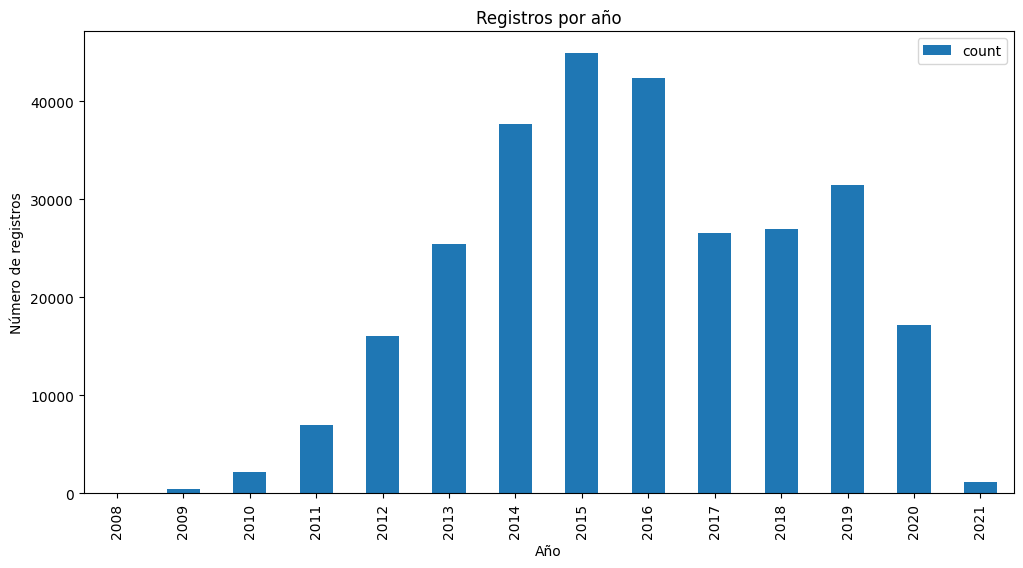

In [19]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame y 'host_since' la columna con las fechas
# Convertir a datetime y extraer el año
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['year'] = data['host_since'].dt.year

# Crear un DataFrame con todos los años posibles (desde el mínimo al máximo)
min_year = int(data['year'].min())
max_year = int(data['year'].max())
all_years = pd.DataFrame({'year': range(min_year, max_year + 1)})

# Contar registros por año
count_by_year = data['year'].value_counts().reset_index()
count_by_year.columns = ['year', 'count']

# Unir con todos los años posibles para incluir los que no tienen datos
count_by_year = all_years.merge(count_by_year, on='year', how='left')

# Opcional: Reemplazar NaN por 0 si prefieres
# count_by_year['count'] = count_by_year['count'].fillna(0)

# Calcular estadísticas
moda_year = count_by_year.loc[count_by_year['count'].idxmax(), 'year'] if not count_by_year.empty else None

# Año con menos registros (excluyendo NaN/cero si es necesario)
if not count_by_year.empty:
    min_non_zero = count_by_year[count_by_year['count'] > 0]['count'].idxmin() if any(count_by_year['count'] > 0) else None
    min_year = count_by_year.loc[min_non_zero, 'year'] if min_non_zero is not None else None
else:
    min_year = None

# Mostrar resultados

print("\nRegistros por año:")
print(count_by_year.sort_values('year').to_string(index=False))

print(f"\nAño con más registros (moda): {moda_year}")
print(f"Año con menos registros (excluyendo años sin datos): {min_year}")

# Opcional: Gráfico de barras
import matplotlib.pyplot as plt
count_by_year.sort_values('year').plot(x='year', y='count', kind='bar', figsize=(12, 6))
plt.title("Registros por año")
plt.xlabel("Año")
plt.ylabel("Número de registros")
plt.show()

ANALISIS CUANTITATIVO SIN OUTLIERS

In [3]:
import pandas as pd
from datetime import datetime

# Convertir a tipo datetime
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')


In [8]:
fechas_validas = data['host_since'].dropna()


In [9]:
hoy = pd.Timestamp.today()
dias_actividad = (hoy - fechas_validas).dt.days


In [10]:
q1 = dias_actividad.quantile(0.25)
q3 = dias_actividad.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = dias_actividad[(dias_actividad < limite_inferior) | (dias_actividad > limite_superior)]
dias_sin_outliers = dias_actividad[(dias_actividad >= limite_inferior) & (dias_actividad <= limite_superior)]


In [11]:
if not dias_sin_outliers.empty:
    print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
    print("Análisis Cuantitativo de antigüedad del host (en días, sin outliers):")
    print(f" - Promedio: {dias_sin_outliers.mean():.2f} días")
    print(f" - Mínimo: {dias_sin_outliers.min()} días")
    print(f" - Máximo: {dias_sin_outliers.max()} días")
    print(f" - Desviación estándar: {dias_sin_outliers.std():.2f}")
    print(f" - Q1: {dias_sin_outliers.quantile(0.25)} días")
    print(f" - Mediana: {dias_sin_outliers.median()} días")
    print(f" - Q3: {dias_sin_outliers.quantile(0.75)} días")
    print(f" - Varianza: {dias_sin_outliers.var():.2f}")
    print(f" - Curtosis: {dias_sin_outliers.kurtosis():.4f}")
    print(f" - Asimetría: {dias_sin_outliers.skew():.4f}")
else:
    print("No hay suficientes datos para análisis.")


Cantidad de outliers detectados: 60
Análisis Cuantitativo de antigüedad del host (en días, sin outliers):
 - Promedio: 3355.86 días
 - Mínimo: 1575 días
 - Máximo: 6067 días
 - Desviación estándar: 889.32
 - Q1: 2628.0 días
 - Mediana: 3413.0 días
 - Q3: 4007.0 días
 - Varianza: 790889.98
 - Curtosis: -0.7314
 - Asimetría: 0.0134


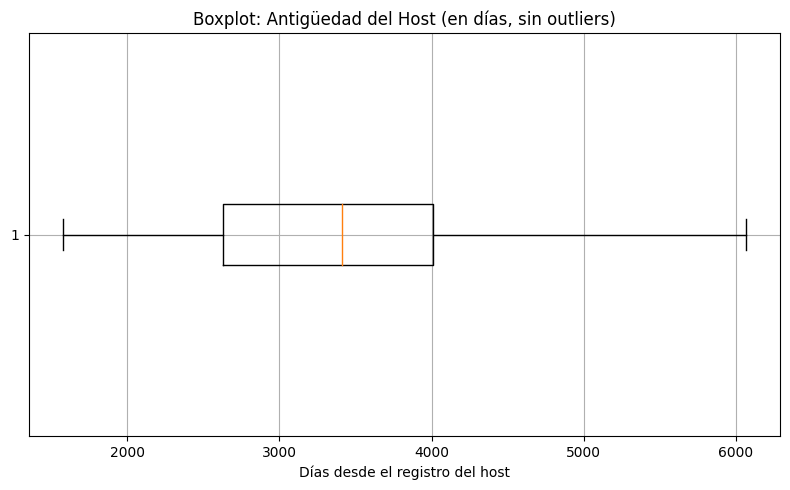

In [13]:
import matplotlib.pyplot as plt

if not dias_sin_outliers.empty:
  

    # 🎨 Generar boxplot con los datos reales sin outliers
    plt.figure(figsize=(8, 5))
    plt.boxplot(dias_sin_outliers, vert=False)
    plt.title('Boxplot: Antigüedad del Host (en días, sin outliers)')
    plt.xlabel('Días desde el registro del host')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("No hay suficientes datos para análisis.")
